### LSTM Forecast for The_Rise_of_AI

In [24]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [25]:
# 1. Load Data
# =========================
df = pd.read_csv('../../data/processed/cleaned_The_Rise_of_AI.csv')
values = df['Global AI Market Value(in Billions)'].values.reshape(-1,1)

In [26]:
# Scale values between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)

In [27]:
# =========================
# 2. Prepare Sequences
# =========================
seq_length = 3
X, y = [], []
for i in range(len(scaled)-seq_length):
    X.append(scaled[i:i+seq_length])
    y.append(scaled[i+seq_length])
X, y = np.array(X), np.array(y)

In [28]:
# Reshape for LSTM (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

In [29]:
# =========================
# 3. Build LSTM Model
# =========================
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


c:\Users\Sk Samdan\Desktop\ML_project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
# Train
model.fit(X, y, epochs=300, verbose=0)

In [31]:
# =========================
# 4. Predict Future 5 Years
# =========================
forecast_steps = 5
last_seq = scaled[-seq_length:]
preds = []

for _ in range(forecast_steps):
    pred = model.predict(last_seq.reshape(1, seq_length, 1), verbose=0)
    preds.append(pred[0,0])
    last_seq = np.append(last_seq[1:], pred).reshape(seq_length, 1)

In [32]:

# Inverse scale predictions
future_preds = scaler.inverse_transform(np.array(preds).reshape(-1,1))

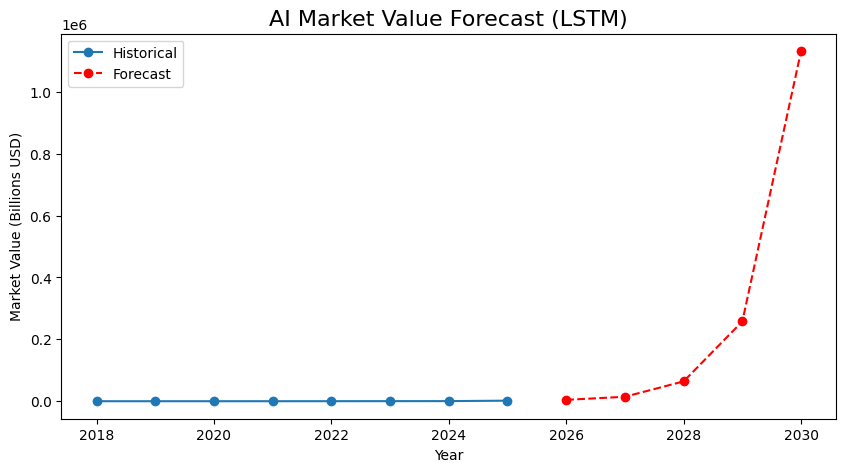

In [36]:
# =========================
# 5. Visualization
# =========================
years = pd.to_datetime(df['Year']).dt.year.tolist()
future_years = list(range(years[-1]+1, years[-1]+forecast_steps+1))

plt.figure(figsize=(10,5))
plt.plot(years, values, marker='o', label='Historical')
plt.plot(future_years, future_preds, marker='o', linestyle='dashed', color='red', label='Forecast')
plt.title('AI Market Value Forecast (LSTM)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Market Value (Billions USD)')
plt.legend()

# Save the figure
plt.savefig('../../results/plot/ai_market_value_forecast_lstm.png', dpi=300, bbox_inches='tight')
plt.show()